Project 3: Unsupervised Learning

tpham328

White Wine Quality Dataset

In [107]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score
from sklearn.mixture import GaussianMixture
from sklearn.metrics import homogeneity_score, completeness_score
import time
import seaborn as sns
import matplotlib.pyplot as plt 

from warnings import filterwarnings
filterwarnings(action='ignore')

In [108]:
data = pd.read_csv("winequality-white.csv")
print("Successfully Imported Data!")

data.head()
print(data.shape)

Successfully Imported Data!
(4898, 12)


In [109]:
data.describe(include='all')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


<Axes: >

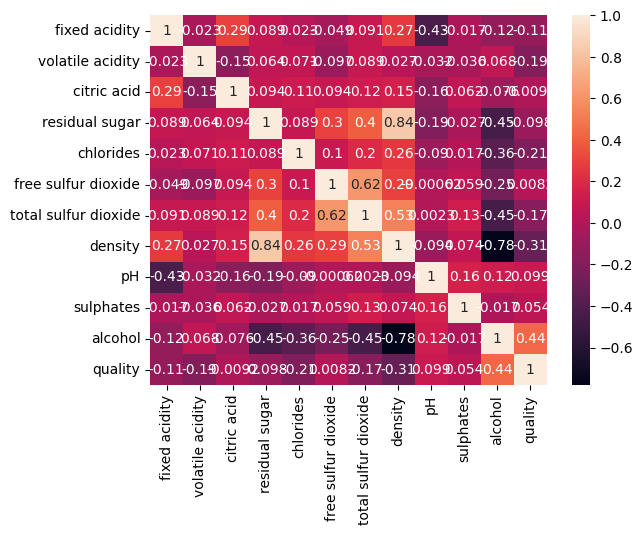

In [110]:
corr = data.corr()
sns.heatmap(corr,annot=True)

In [111]:


# Assuming 'data' is your dataframe and 'quality' is the label column
X = data.drop(columns='quality')
original_Y = data['quality']

original_Y = data['quality']
def class_quality(value):
    if value <= 5:
        return 0
    elif value == 6:
        return 1
    elif value >= 7:
        return 2
Y = original_Y.apply(class_quality)


# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


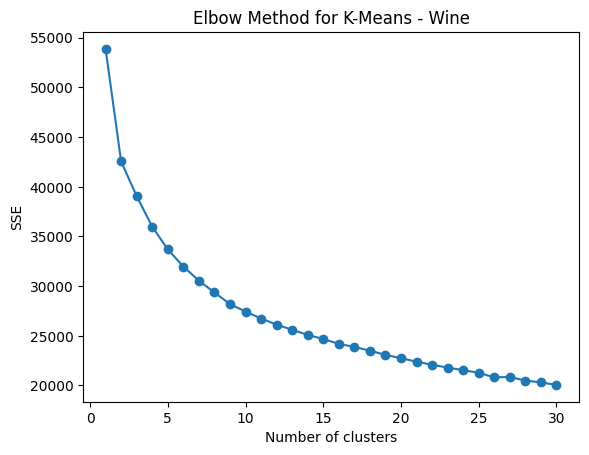

In [112]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Elbow method to determine the optimal number of clusters
sse = []
for k in range(1, 31):
    kmeans = KMeans(n_clusters=k, random_state=328)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)

# plt.figure(figsize=(10, 6))
plt.plot(range(1, 31), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.title('Elbow Method for K-Means - Wine')
plt.show()


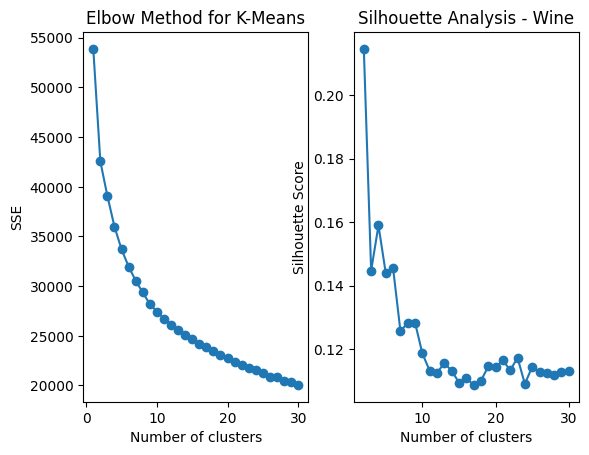

In [113]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
for k in range(2, 31):
    kmeans = KMeans(n_clusters=k, random_state=328)
    kmeans_labels = kmeans.fit_predict(X_scaled)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans_labels))

# # plt.figure(figsize=(10, 6))
# plt.plot(range(2, 31), silhouette_scores, marker='o')
# plt.xlabel('Number of clusters')
# plt.ylabel('Silhouette Score')
# plt.title('Silhouette Analysis for K-Means - Wine')
# plt.show()

plt.subplot(1,2,1)
plt.plot(range(1, 31), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.title('Elbow Method for K-Means')

plt.subplot(1,2,2)
plt.plot(range(2, 31), silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis - Wine')
plt.show()


In [114]:
print(data.columns)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


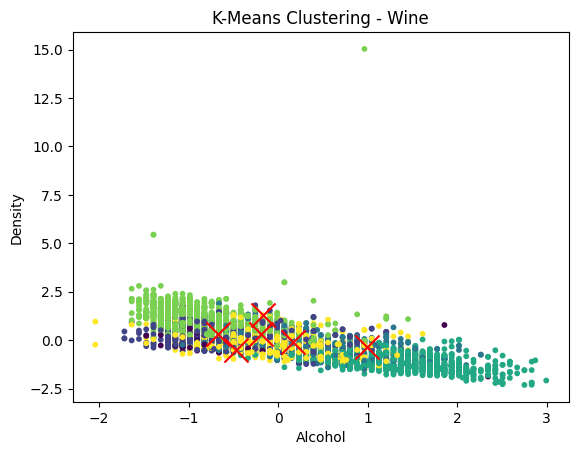

KMeans Homogeneity: 0.095
KMeans Completeness: 0.061


In [115]:
# Optimal number of clusters from the Elbow or Silhouette method
optimal_clusters = 6

kmeans = KMeans(n_clusters=optimal_clusters, random_state=328)
kmeans_labels = kmeans.fit_predict(X_scaled)

# Calculate homogeneity and completeness for KMeans
kmeans_homogeneity = homogeneity_score(Y, kmeans_labels)
kmeans_completeness = completeness_score(Y, kmeans_labels)

# Scatter plot with cluster centers
# plt.figure(figsize=(10, 6))
plt.scatter(X_scaled[:, 10], X_scaled[:,7], c=kmeans_labels, marker='o', s = 10)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='x')
plt.xlabel('Alcohol')
plt.ylabel('Density')
plt.title('K-Means Clustering - Wine')
plt.show()

print(f"KMeans Homogeneity: {kmeans_homogeneity:.3f}")
print(f"KMeans Completeness: {kmeans_completeness:.3f}")


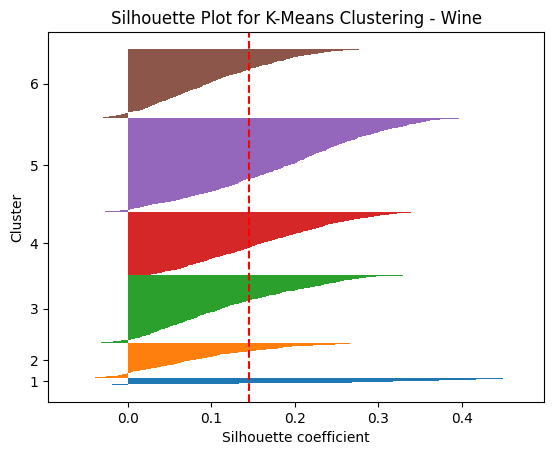

In [116]:
import numpy as np
import matplotlib.cm as cm
from sklearn.metrics import silhouette_samples

# Silhouette plot
silhouette_vals = silhouette_samples(X_scaled, kmeans_labels)
y_ticks = []
y_lower, y_upper = 0, 0
# plt.figure(figsize=(10, 6))

for i, cluster in enumerate(np.unique(kmeans_labels)):
    cluster_silhouette_vals = silhouette_vals[kmeans_labels == cluster]
    cluster_silhouette_vals.sort()
    y_upper += len(cluster_silhouette_vals)
    plt.barh(range(y_lower, y_upper), cluster_silhouette_vals, height=1)
    y_ticks.append((y_lower + y_upper) / 2)
    y_lower += len(cluster_silhouette_vals)

plt.axvline(np.mean(silhouette_vals), color="red", linestyle="--")
plt.yticks(y_ticks, np.unique(kmeans_labels) + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.title('Silhouette Plot for K-Means Clustering - Wine')
plt.show()


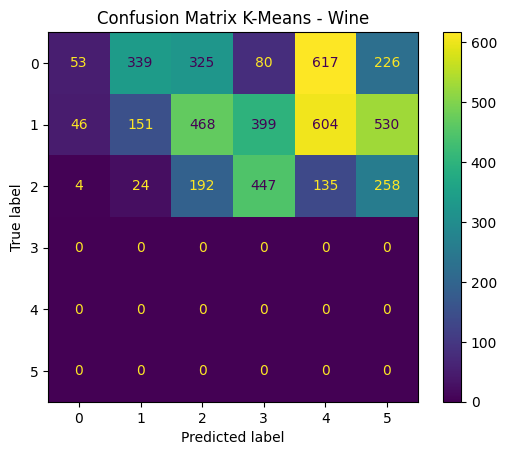

In [117]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm_kmeans = confusion_matrix(Y, kmeans_labels)
disp_kmeans = ConfusionMatrixDisplay(confusion_matrix=cm_kmeans)
disp_kmeans.plot()
plt.title('Confusion Matrix K-Means - Wine')
# class_names = [0, 1, 2]  # Modify this list according to your classes
# tick_marks = range(len(class_names))
# plt.yticks(tick_marks, class_names)
plt.show()

In [118]:
value_counts = Y.value_counts().sort_index()

# Print the summary
print(value_counts)

quality
0    1640
1    2198
2    1060
Name: count, dtype: int64


# EM Clustering

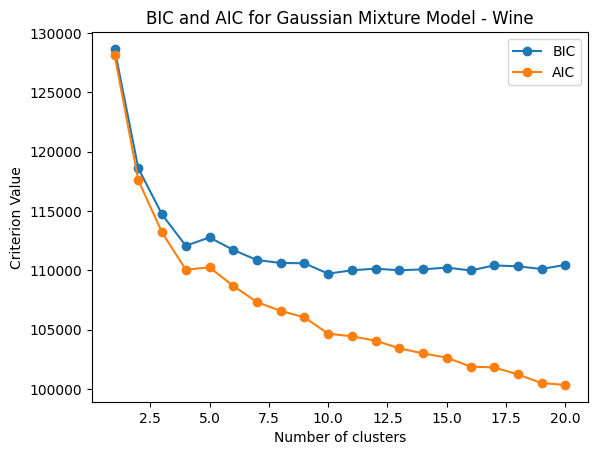

In [119]:

n_components_range = range(1, 21)
bics = []
aics = []

for n_components in n_components_range:
    gmm = GaussianMixture(n_components=n_components, random_state=328)
    gmm.fit(X_scaled)
    bics.append(gmm.bic(X_scaled))
    aics.append(gmm.aic(X_scaled))

# Plot BIC and AIC

plt.plot(n_components_range, bics, label='BIC', marker='o')
plt.plot(n_components_range, aics, label='AIC', marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Criterion Value')
plt.title('BIC and AIC for Gaussian Mixture Model - Wine')
plt.legend()
plt.show()


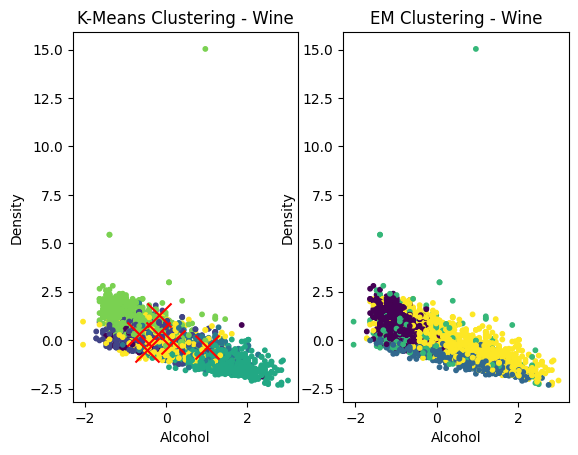

Gaussian Mixture Homogeneity: 0.061
Gaussian Mixture Completeness: 0.051


In [120]:
from sklearn.mixture import GaussianMixture

# Apply Gaussian Mixture Model
gmm = GaussianMixture(n_components=4, random_state=328)
gmm_labels = gmm.fit_predict(X_scaled)

# Calculate homogeneity and completeness for Gaussian Mixture
gmm_homogeneity = homogeneity_score(Y, gmm_labels)
gmm_completeness = completeness_score(Y, gmm_labels)

# Scatter plot
# plt.figure(figsize=(10, 6))
plt.subplot(1,2,1)
plt.scatter(X_scaled[:, 10], X_scaled[:,7], c=kmeans_labels, marker='o', s = 10)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='x')
plt.xlabel('Alcohol')
plt.ylabel('Density')
plt.title('K-Means Clustering - Wine')

plt.subplot(1,2,2)
plt.scatter(X_scaled[:, 10], X_scaled[:, 7], c=gmm_labels, marker='o', s = 10)
plt.xlabel('Alcohol')
plt.ylabel('Density')
plt.title('EM Clustering - Wine')
plt.show()


print(f"Gaussian Mixture Homogeneity: {gmm_homogeneity:.3f}")
print(f"Gaussian Mixture Completeness: {gmm_completeness:.3f}")

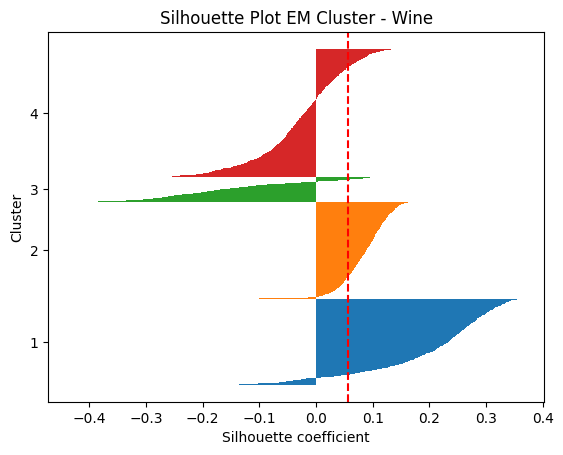

In [121]:
# Silhouette plot for GMM
silhouette_vals_gmm = silhouette_samples(X_scaled, gmm_labels)
y_ticks = []
y_lower, y_upper = 0, 0
# plt.figure(figsize=(10, 6))

for i, cluster in enumerate(np.unique(gmm_labels)):
    cluster_silhouette_vals = silhouette_vals_gmm[gmm_labels == cluster]
    cluster_silhouette_vals.sort()
    y_upper += len(cluster_silhouette_vals)
    plt.barh(range(y_lower, y_upper), cluster_silhouette_vals, height=1)
    y_ticks.append((y_lower + y_upper) / 2)
    y_lower += len(cluster_silhouette_vals)

plt.axvline(np.mean(silhouette_vals_gmm), color="red", linestyle="--")
plt.yticks(y_ticks, np.unique(gmm_labels) + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.title('Silhouette Plot EM Cluster - Wine')
plt.show()


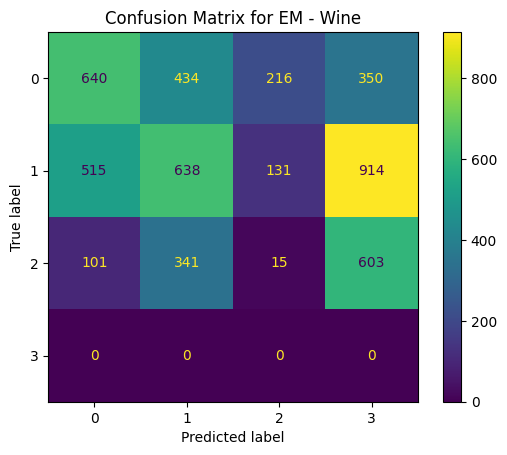

In [122]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm_gmm = confusion_matrix(Y, gmm_labels)
disp_kmeans = ConfusionMatrixDisplay(confusion_matrix=cm_gmm)
disp_kmeans.plot()
plt.title('Confusion Matrix for EM - Wine')
plt.show()

# Measure time

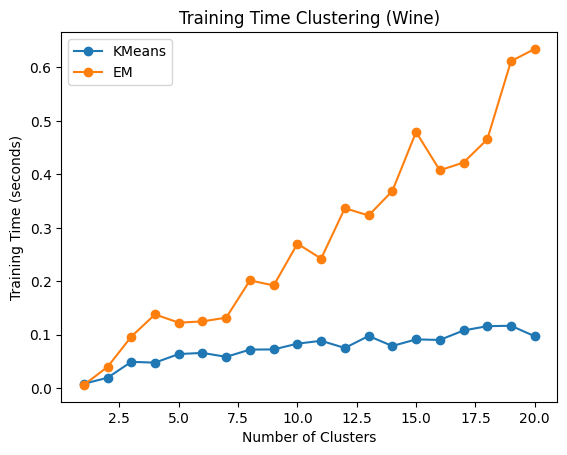

In [123]:

kmeans_times = []
em_times = []

# Iterate over the number of clusters from 1 to 10
for n_clusters in range(1, 21):
    # Measure the time for KMeans
    start_time = time.time()
    kmeans = KMeans(n_clusters=n_clusters, random_state=328)
    kmeans.fit(X_scaled)
    kmeans_times.append(time.time() - start_time)
    
    # Measure the time for EM (Gaussian Mixture)
    start_time = time.time()
    gmm = GaussianMixture(n_components=n_clusters, random_state=328)
    gmm.fit(X_scaled)
    em_times.append(time.time() - start_time)

# Plot the training times for both KMeans and EM clustering

plt.plot(range(1, 21), kmeans_times, marker='o', label='KMeans')
plt.plot(range(1, 21), em_times, marker='o', label='EM')
plt.xlabel('Number of Clusters')
plt.ylabel('Training Time (seconds)')
plt.title('Training Time Clustering (Wine)')
plt.legend()
plt.show()